<a href="https://colab.research.google.com/github/RonaldBH/Ruben-Ronald-Bautista-Huillca/blob/main/Clasificador_de_imagenes_hojas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ruben Ronald Bautista Huillca 184641
#- Proyecto : clasificador de imaganes de hojas**
12/02/2022

# **Importar Librerias**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Ruta de los datos de entrenamiento y prueba**

In [ ]:
#Dar la ruta del conjunto de datos
train_path = '/content/drive/MyDrive/20222colab/deeplearning/data1/train'
test_path = '/content/drive/MyDrive/20222colab/deeplearning/data1/test'

In [ ]:
folders = glob('/content/drive/MyDrive/20222colab/deeplearning/data1/train*')
len(folders)

1

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Diseñando nuestro modelo InceptionV3**

In [ ]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# Congelamos las últimas 15 capas
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=2, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)

model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_658 (Conv2D)            (None, 99, 99, 32)   864         ['input_12[0][0]']               
                                                                                                  
 batch_normalization_658 (Batch  (None, 99, 99, 32)  96          ['conv2d_658[0][0]']             
 Normalization)                                                                                   
                                                                                           

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

##**Aumento de imagen (para prevenir el probema del sobreajuste)**

In [ ]:
# Utilice el generador de datos de imágenes para importar las imágenes del conjunto de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#sin voltear y hacer zoom para la base de datos de prueba

In [ ]:
# Asegúrese de proporcionar el mismo tamaño de destino inicializado para el tamaño de la imagen
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/20222colab/deeplearning/data1/train',
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 52 images belonging to 2 classes.


In [ ]:
print (len(training_set))

2


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/20222colab/deeplearning/data1/test',
                                            target_size = (200, 200),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20 images belonging to 2 classes.


## **Entrenando nuestro modelo**

In [ ]:
# ajustar el  modelo
# Ejecuta la celda. Llevará algún tiempo ejecutar
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=8,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/8
2/2 [==============================] - 8s 2s/step - loss: 0.9406 - accuracy: 0.5577 - val_loss: 0.2459 - val_accuracy: 0.9500
Epoch 2/8
2/2 [==============================] - 1s 433ms/step - loss: 0.3267 - accuracy: 0.8269 - val_loss: 0.1912 - val_accuracy: 0.9500
Epoch 3/8
2/2 [==============================] - 1s 443ms/step - loss: 0.0860 - accuracy: 0.9615 - val_loss: 1.7156 - val_accuracy: 0.5500
Epoch 4/8
2/2 [==============================] - 1s 621ms/step - loss: 0.1271 - accuracy: 0.9615 - val_loss: 2.3285 - val_accuracy: 0.5000
Epoch 5/8
2/2 [==============================] - 1s 467ms/step - loss: 0.1587 - accuracy: 0.9423 - val_loss: 0.5503 - val_accuracy: 0.9000
Epoch 6/8
2/2 [==============================] - 1s 654ms/step - loss: 0.0578 - accuracy: 0.9808 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 7/8
2/2 [==============================] - 1s 441ms/step - loss: 0.1196 - accuracy: 0.9808 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 8/8
2/2 [===============

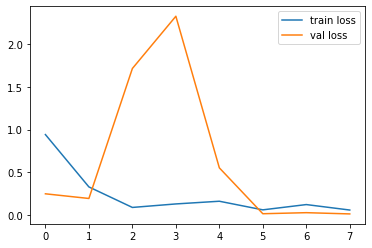

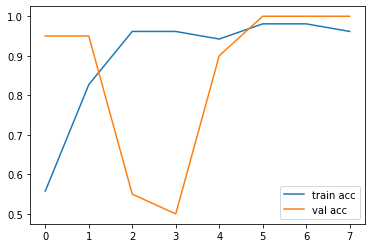

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotear la pérdida
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plotear la precisión
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('modelcancerlung.h5')

#**Diseñando nuestro modelo VGG16**

In [ ]:
VGG16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# Congelamos las últimas 15 capas
for layer in VGG16.layers[:-15]:
    layer.trainable = False

x = VGG16.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=2, activation='softmax')(x)
model2 = Model(VGG16.input, output)

model2.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0  

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

## **Aumento de imagen (para prevenir el probema del sobreajuste)**

In [ ]:
# Utilice el generador de datos de imágenes para importar las imágenes del conjunto de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#sin voltear y hacer zoom para la base de datos de prueba

In [ ]:
# Asegúrese de proporcionar el mismo tamaño de destino inicializado para el tamaño de la imagen
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/20222colab/deeplearning/data1/train',
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 52 images belonging to 2 classes.


In [ ]:
print (len(training_set))

2


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/20222colab/deeplearning/data1/test',
                                            target_size = (200, 200),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20 images belonging to 2 classes.


##**Entrenando nuestro modelo**

In [ ]:
r1 = model2.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
2/2 [==============================] - 1s 565ms/step - loss: 0.7580 - accuracy: 0.4423 - val_loss: 0.7004 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 1s 469ms/step - loss: 0.7158 - accuracy: 0.5385 - val_loss: 0.7209 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 1s 798ms/step - loss: 0.6876 - accuracy: 0.5769 - val_loss: 0.7358 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 1s 501ms/step - loss: 0.6947 - accuracy: 0.6154 - val_loss: 0.6996 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 1s 817ms/step - loss: 0.7138 - accuracy: 0.5000 - val_loss: 0.7023 - val_accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 1s 690ms/step - loss: 0.7015 - accuracy: 0.5192 - val_loss: 0.7133 - val_accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 1s 747ms/step - loss: 0.7079 - accuracy: 0.5385 - val_loss: 0.7211 - val_accuracy: 0.5000
Epoch 8/10
2/2 [====

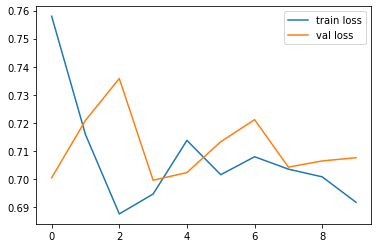

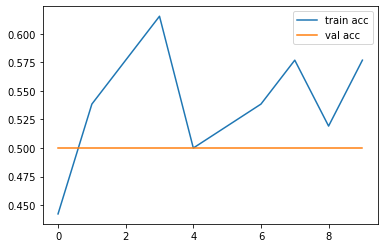

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotear la pérdida
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plotear la precisión
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model2.save('modelcancerlung.h5')

#**Diseñando nuestro modelo RESNET50-V2**

In [ ]:
ResNet50V2 = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# Congelamos las últimas 15 capas
for layer in ResNet50V2.layers[:-15]:
    layer.trainable = False

x = ResNet50V2.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=2, activation='softmax')(x)
model3 = Model(ResNet50V2.input, output)

model3.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_14[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

## **Aumento de imagen (para prevenir el probema del sobreajuste)**

In [ ]:
# Utilice el generador de datos de imágenes para importar las imágenes del conjunto de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#sin voltear y hacer zoom para la base de datos de prueba

In [ ]:
# Asegúrese de proporcionar el mismo tamaño de destino inicializado para el tamaño de la imagen
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/20222colab/deeplearning/data1/train',
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 52 images belonging to 2 classes.


In [ ]:
print (len(training_set))

2


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/20222colab/deeplearning/data1/test',
                                            target_size = (200, 200),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20 images belonging to 2 classes.


## **Entrenando nuestro modelo**

In [ ]:
r2 = model3.fit(
  training_set,
  validation_data=test_set,
  epochs=8,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/8
2/2 [==============================] - 7s 2s/step - loss: 0.7317 - accuracy: 0.5385 - val_loss: 0.5739 - val_accuracy: 0.6000
Epoch 2/8
2/2 [==============================] - 1s 614ms/step - loss: 0.1151 - accuracy: 0.9808 - val_loss: 0.5468 - val_accuracy: 0.6000
Epoch 3/8
2/2 [==============================] - 1s 437ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.7415 - val_accuracy: 0.6000
Epoch 4/8
2/2 [==============================] - 1s 643ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.7163 - val_accuracy: 0.7500
Epoch 5/8
2/2 [==============================] - 1s 623ms/step - loss: 1.9769e-04 - accuracy: 1.0000 - val_loss: 0.6583 - val_accuracy: 0.8000
Epoch 6/8
2/2 [==============================] - 1s 426ms/step - loss: 2.3873e-04 - accuracy: 1.0000 - val_loss: 0.6365 - val_accuracy: 0.8500
Epoch 7/8
2/2 [==============================] - 1s 629ms/step - loss: 4.4447e-05 - accuracy: 1.0000 - val_loss: 0.6473 - val_accuracy: 0.9000
Epoch 8/8
2/2 [===

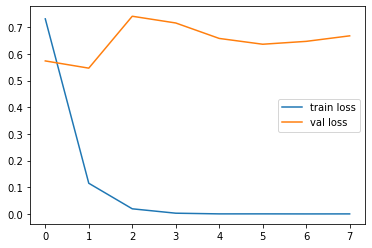

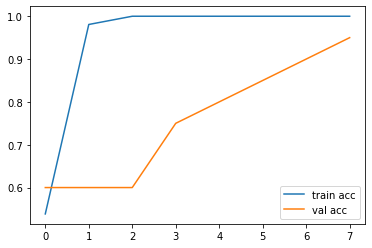

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotear la pérdida
plt.plot(r2.history['loss'], label='train loss')
plt.plot(r2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plotear la precisión
plt.plot(r2.history['accuracy'], label='train acc')
plt.plot(r2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# **Haciendo Predicciones**

##Para INCEPTION-V3

In [ ]:
y_pred = model.predict(test_set)

1/1 [==============================] - 0s 137ms/step


In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
classes = ["kiwicha","quinua"]

In [ ]:
def predict_image(img):
    plt.figure(figsize=(40,8))
    print()
    print('-----------------------------------calsificador de hojas---------------------------------------------------')
    print()
    print('----------------------------------------------RESULT-------------------------------------------------------------')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    #img_data=preprocess_input(x)

    print(classes[np.argmax(model.predict(x))])


-----------------------------------calsificador de hojas---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 25ms/step
kiwicha


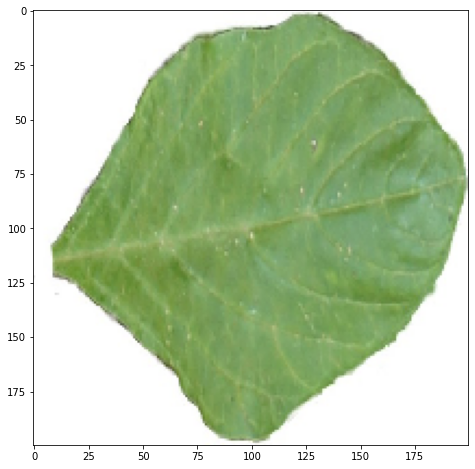

In [ ]:
im=image.load_img('/content/drive/MyDrive/20222colab/deeplearning/data1/test/kiwicha/Kiwicha-08-180-C.jpg',target_size=(200,200))
predict_image(im)


-----------------------------------calsificador de hojas---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 24ms/step
kiwicha


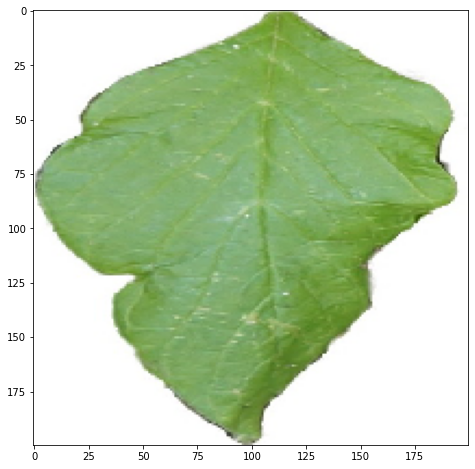

In [ ]:
im2=image.load_img('/content/drive/MyDrive/20222colab/deeplearning/data1/test/kiwicha/Kiwicha-09-090-C.jpg',target_size=(200,200))
predict_image(im2)


-----------------------------------calsificador de hojas---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 27ms/step
kiwicha


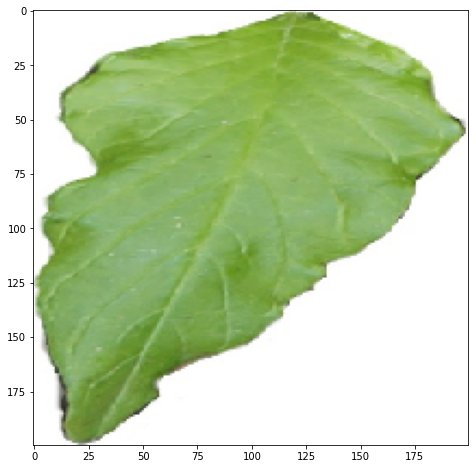

In [ ]:
im3=image.load_img('/content/drive/MyDrive/20222colab/deeplearning/data1/test/kiwicha/Kiwicha-10-000-C.jpg',target_size=(200,200))
predict_image(im3)


-----------------------------------calsificador de hojas---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 26ms/step
quinua


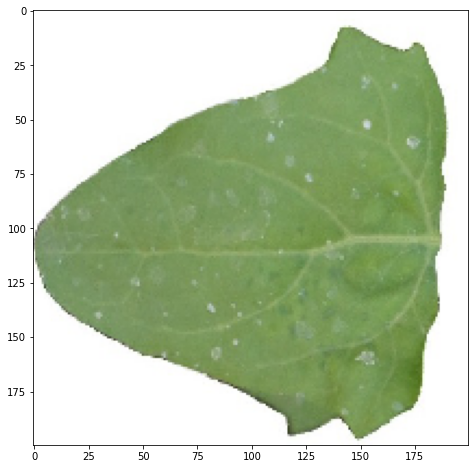

In [ ]:
im4=image.load_img('/content/drive/MyDrive/20222colab/deeplearning/data1/test/quinua/Quinua_06_270_C.jpg',target_size=(200,200))
predict_image(im4)


-----------------------------------calsificador de hojas---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 24ms/step
quinua


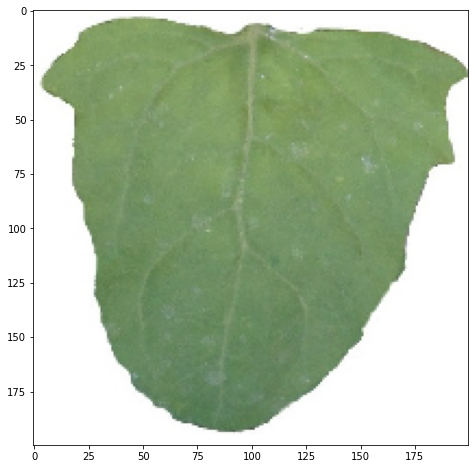

In [ ]:
im5=image.load_img('/content/drive/MyDrive/20222colab/deeplearning/data1/test/quinua/Quinua_08_090_C.jpg',target_size=(200,200))
predict_image(im5)

##Para VGG16

In [ ]:
y_pred2 = model2.predict(test_set)

1/1 [==============================] - 0s 143ms/step


In [ ]:
import numpy as np
y_pred2 = np.argmax(y_pred2, axis=1)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
classes = ["kiwicha","quinua"]

In [ ]:
def predict_image2(img):
    plt.figure(figsize=(40,8))
    print()
    print('-----------------------------------calsificador de hojas---------------------------------------------------')
    print()
    print('----------------------------------------------RESULT-------------------------------------------------------------')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    #img_data=preprocess_input(x)

    print(classes[np.argmax(model2.predict(x))])


-----------------------------------calsificador de hojas---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 1s 767ms/step
kiwicha


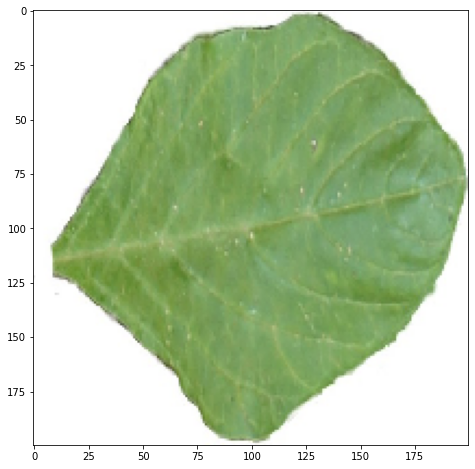

In [ ]:
im=image.load_img('/content/drive/MyDrive/20222colab/deeplearning/data1/test/kiwicha/Kiwicha-08-180-C.jpg',target_size=(200,200))
predict_image2(im)


-----------------------------------calsificador de hojas---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 20ms/step
kiwicha


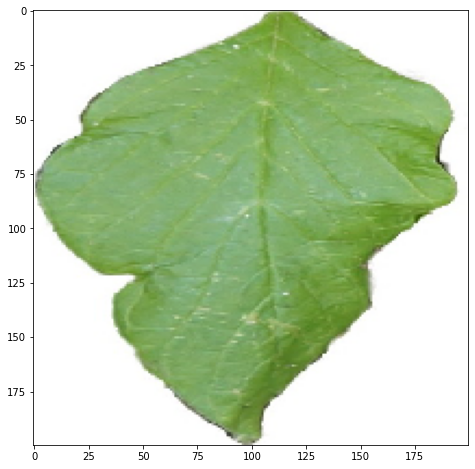

In [ ]:
im2=image.load_img('/content/drive/MyDrive/20222colab/deeplearning/data1/test/kiwicha/Kiwicha-09-090-C.jpg',target_size=(200,200))
predict_image2(im2)


-----------------------------------calsificador de hojas---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 20ms/step
kiwicha


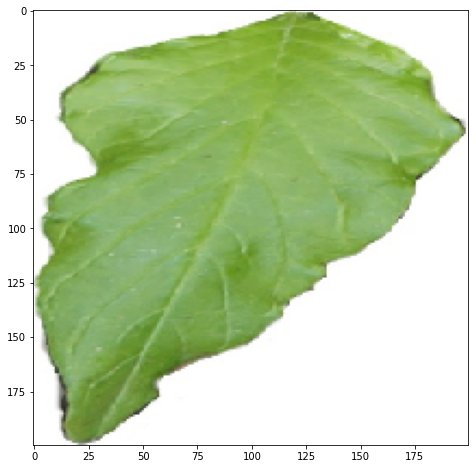

In [ ]:
im3=image.load_img('/content/drive/MyDrive/20222colab/deeplearning/data1/test/kiwicha/Kiwicha-10-000-C.jpg',target_size=(200,200))
predict_image2(im3)


-----------------------------------calsificador de hojas---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 64ms/step
kiwicha


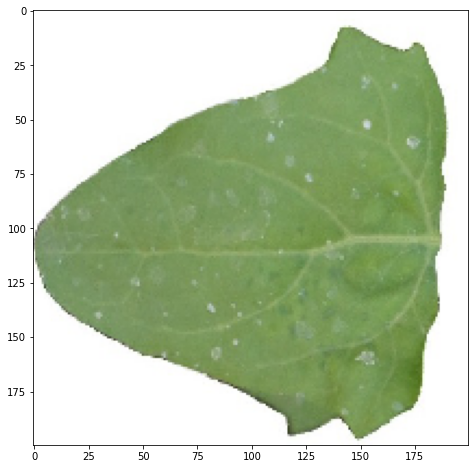

In [ ]:
im4=image.load_img('/content/drive/MyDrive/20222colab/deeplearning/data1/test/quinua/Quinua_06_270_C.jpg',target_size=(200,200))
predict_image2(im4)


-----------------------------------calsificador de hojas---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 24ms/step
kiwicha


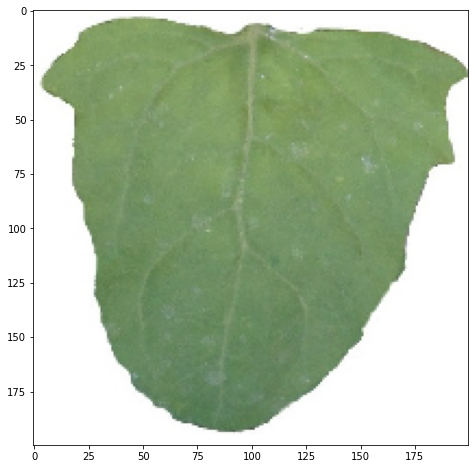

In [ ]:
im5=image.load_img('/content/drive/MyDrive/20222colab/deeplearning/data1/test/quinua/Quinua_08_090_C.jpg',target_size=(200,200))
predict_image2(im5)

##Para RESNET50-V2

In [ ]:
y_pred3 = model3.predict(test_set)

1/1 [==============================] - 1s 953ms/step


In [ ]:
import numpy as np
y_pred3 = np.argmax(y_pred3, axis=1)
y_pred3

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
classes = ["kiwicha","quinua"]

In [ ]:
def predict_image3(img):
    plt.figure(figsize=(40,8))
    print()
    print('-----------------------------------calsificador de hojas---------------------------------------------------')
    print()
    print('----------------------------------------------RESULT-------------------------------------------------------------')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    #img_data=preprocess_input(x)

    print(classes[np.argmax(model3.predict(x))])


-----------------------------------calsificador de hojas---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 1s 1s/step
kiwicha


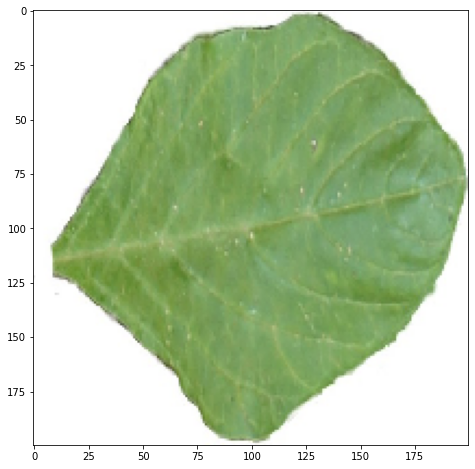

In [ ]:
im=image.load_img('/content/drive/MyDrive/20222colab/deeplearning/data1/test/kiwicha/Kiwicha-08-180-C.jpg',target_size=(200,200))
predict_image3(im)


-----------------------------------calsificador de hojas---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 46ms/step
kiwicha


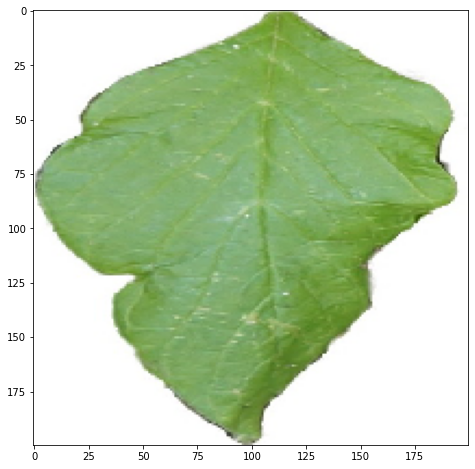

In [ ]:
im2=image.load_img('/content/drive/MyDrive/20222colab/deeplearning/data1/test/kiwicha/Kiwicha-09-090-C.jpg',target_size=(200,200))
predict_image3(im2)


-----------------------------------calsificador de hojas---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 21ms/step
kiwicha


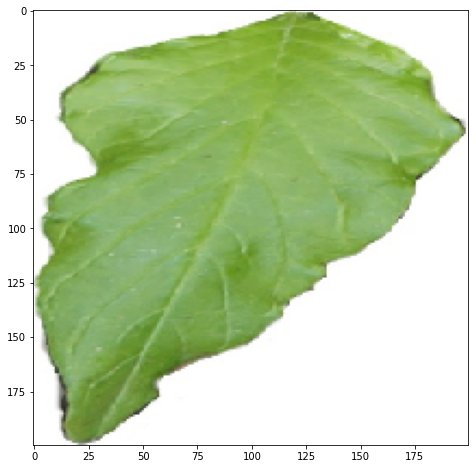

In [ ]:
im3=image.load_img('/content/drive/MyDrive/20222colab/deeplearning/data1/test/kiwicha/Kiwicha-10-000-C.jpg',target_size=(200,200))
predict_image3(im3)


-----------------------------------calsificador de hojas---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 24ms/step
quinua


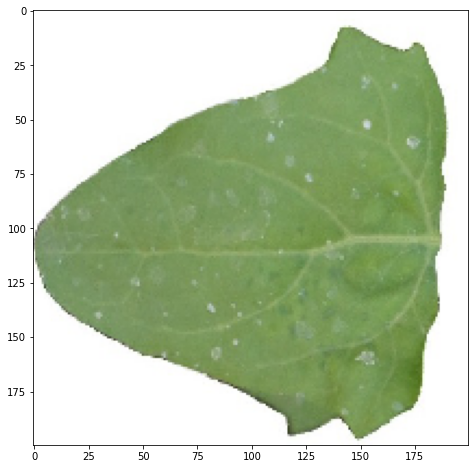

In [ ]:
im4=image.load_img('/content/drive/MyDrive/20222colab/deeplearning/data1/test/quinua/Quinua_06_270_C.jpg',target_size=(200,200))
predict_image3(im4)


-----------------------------------calsificador de hojas---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 [==============================] - 0s 21ms/step
quinua


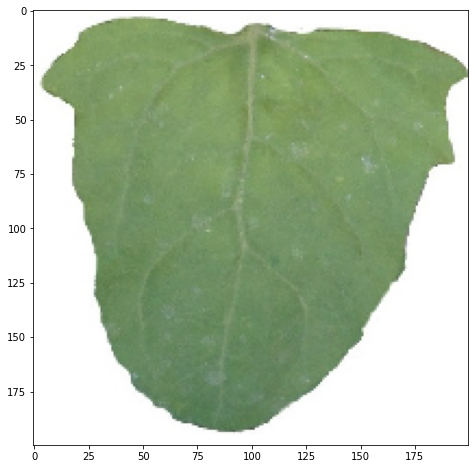

In [ ]:
im5=image.load_img('/content/drive/MyDrive/20222colab/deeplearning/data1/test/quinua/Quinua_08_090_C.jpg',target_size=(200,200))
predict_image3(im5)

#CONCLUSIONES

##Nuestra comparacion y precidicion de modelos nos mostraron que para este caso de prueba de hojas los mejores modelos son INCEPTION-V3 y RESNET50-V2, mientras que es el modelo VGG16 no tuvo un mejor desempeño